# What Makes a Movie Profitable? Indicators of Box Office Success

**Solana San Pietro and Anthony Eid**

**Data Bootcamp Spring 2017 UG Section**
**Final Project**


![Movies](http://www.marcustheatres.com/media/images/gallery-images/majestic-cinema-of-brookfield/41-majesticbrookfield-exteriorjpg.jpg)




## Background ##

In 2016, the [global film industry](https://www.statista.com/topics/964/film/) generated 38 billion US dollars, and revenues are projected to increase to nearly 50 billion US dollars by 2020. However, although a highly profitable industry as a whole, every movie produced also requires a high level of investment from studios, producers, etc. with little guarantee that there will be a return on investment. A movie's profitability is increasingly elusive with the shift in consumer behavior towards media consumption and [rising marketing costs](http://www.hollywoodreporter.com/news/200-million-rising-hollywood-struggles-721818). 
 
The unpredicatability of a movie's profitability was highlighted recently with the failure of the movie ["The Great Wall"](http://www.hollywoodreporter.com/news/what-great-walls-box-office-flop-will-cost-studios-981602). Financed through a joint partnership between the US and China, the movie was expected to be a huge success. Nonetheless, the movie only made 34.8 million US dollars in the North American box office, in comparison with a production budget of 150 million US dollars. 

On the other hand, [Amazon](http://www.businessinsider.com/amazon-investing-well-over-3-billion-in-video-says-analyst-2016-12) has been investing over 3 billion US dollars annually in original content with various success stories such as their investment in "Manchester in the Sea", which recieved six Oscar nominations in 2017. 

The profitability of an individual film is highly unpredictable, but industry investors would be put at ease if there could be some understanding of whether their investments will be worthwhile. Therefore, we want to look at the best indicators to predict a film’s success. We define a film's success by its domestic box office revenue.

## Data ##

We acquired our data from the following website: https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset

The "IMDB 5000 Movie Set" contains movie data for over 5000 movies made in the past 100 years. The information was scraped from IMDB's database, and we were able to download it as a CSV file. 

In [190]:
import sys
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import time
import seaborn as sns
from pandas_datareader import wb, data as web

# plotly imports
from plotly.offline import iplot, iplot_mpl  # plotting functions
import plotly.graph_objs as go               # ditto
import plotly                                # just to print version and init notebook
import cufflinks as cf                       # gives us df.iplot that feels like df.plot
cf.set_config_file(offline=True, offline_show_link=False)

%matplotlib inline
plotly.offline.init_notebook_mode(connected=True)

print('Python version:', sys.version)
print('Pandas version: ', pd.__version__)
print('Matplotlib version: ', mpl.__version__)
print('Today: ', dt.date.today())

csv = "/Users/AnthonyEid/Desktop/movie_metadata.csv"

df = pd.read_csv(csv)
df.head()

Python version: 3.5.2 |Anaconda custom (x86_64)| (default, Jul  2 2016, 17:52:12) 
[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
Pandas version:  0.18.1
Matplotlib version:  1.5.3
Today:  2017-05-12


color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0  309404152.0         Action|Adventure|Fantasy   
2                 11000.0  200074175.0        Action|Adventure|Thriller   
3                 27000.0  448130642.0                  Action|Thriller   
4                   131.0          NaN                      Documentary   

          ...          num_user_for_reviews language  country  content_rating  \
0         ...                        3054.0  English      USA           PG-13   
1         ...                        1238.0  English      USA           PG-13   
2         ...                         994.0  English       UK           PG-13   
3         ...                        2701.0  English      USA           PG-13   
4         ...                           NaN      NaN      NaN             NaN   

        budget  title_year actor_2_facebook_likes imdb_score  aspect_ratio  \
0  237000000.0      2009.0                  936.0        7.9          1.78   
1  300000000.0      2007.0                 5000.0        7.1          2.35   
2  245000000.0      2015.0                  393.0        6.8          2.35   
3  250000000.0      2012.0                23000.0        8.5          2.35   
4          NaN         NaN                   12.0        7.1           NaN   

  movie_facebook_likes  
0                33000  
1                    0  
2                85000  
3               164000  
4                    0  

[5 rows x 28 columns]

The "IMDB 5000" dataset included more information than we thought would be necesary or relevant to understanding what factors impact if a movie generates high revenue so we dropped these columns, only keeping data on the following:

    Director
    Gross
    Genre
    Actor
    Movie Name
    Country
    Rating 
    Budget
    Year
    IMBD Score

In [191]:
df.drop(df.columns[[0,2,3,4,5,7,13,15,16,17,18,19,24,26,27]], axis=1, inplace=True)

In [192]:
df.columns = ['Director','Actor 1','Gross','Genre','Actor 2','Movie Name','Number of Votes','Actor 3','Country', 'Rating', 'Budget', 'Year', 'IMDB Score']

In [193]:
df.mean()

Gross              4.846841e+07
Number of Votes    8.366816e+04
Budget             3.975262e+07
Year               2.002471e+03
IMDB Score         6.442138e+00
dtype: float64

In [194]:
print('Variable dtypes:\n', df.dtypes, sep='')
df.head()

Variable dtypes:
Director            object
Actor 1             object
Gross              float64
Genre               object
Actor 2             object
Movie Name          object
Number of Votes      int64
Actor 3             object
Country             object
Rating              object
Budget             float64
Year               float64
IMDB Score         float64
dtype: object


Director           Actor 1        Gross  \
0      James Cameron  Joel David Moore  760505847.0   
1     Gore Verbinski     Orlando Bloom  309404152.0   
2         Sam Mendes      Rory Kinnear  200074175.0   
3  Christopher Nolan    Christian Bale  448130642.0   
4        Doug Walker        Rob Walker          NaN   

                             Genre          Actor 2  \
0  Action|Adventure|Fantasy|Sci-Fi      CCH Pounder   
1         Action|Adventure|Fantasy      Johnny Depp   
2        Action|Adventure|Thriller  Christoph Waltz   
3                  Action|Thriller        Tom Hardy   
4                      Documentary      Doug Walker   

                                          Movie Name  Number of Votes  \
0                                            Avatar            886204   
1          Pirates of the Caribbean: At World's End            471220   
2                                           Spectre            275868   
3                             The Dark Knight Rises           1144337   
4  Star Wars: Episode VII - The Force Awakens    ...                8   

                Actor 3 Country Rating       Budget    Year  IMDB Score  
0             Wes Studi     USA  PG-13  237000000.0  2009.0         7.9  
1        Jack Davenport     USA  PG-13  300000000.0  2007.0         7.1  
2      Stephanie Sigman      UK  PG-13  245000000.0  2015.0         6.8  
3  Joseph Gordon-Levitt     USA  PG-13  250000000.0  2012.0         8.5  
4                   NaN     NaN    NaN          NaN     NaN         7.1

In [195]:
df = df.sort_values('Gross', ascending=False).iloc[:6000]
df.head(5)


Director            Actor 1        Gross  \
0      James Cameron   Joel David Moore  760505847.0   
26     James Cameron       Kate Winslet  658672302.0   
29   Colin Trevorrow         Judy Greer  652177271.0   
794      Joss Whedon  Robert Downey Jr.  623279547.0   
17       Joss Whedon  Robert Downey Jr.  623279547.0   

                                Genre              Actor 2       Movie Name  \
0     Action|Adventure|Fantasy|Sci-Fi          CCH Pounder          Avatar    
26                      Drama|Romance    Leonardo DiCaprio         Titanic    
29   Action|Adventure|Sci-Fi|Thriller  Bryce Dallas Howard  Jurassic World    
794           Action|Adventure|Sci-Fi      Chris Hemsworth    The Avengers    
17            Action|Adventure|Sci-Fi      Chris Hemsworth    The Avengers    

     Number of Votes             Actor 3 Country Rating       Budget    Year  \
0             886204           Wes Studi     USA  PG-13  237000000.0  2009.0   
26            793059       Gloria Stuart     USA  PG-13  200000000.0  1997.0   
29            418214             Omar Sy     USA  PG-13  150000000.0  2015.0   
794           995415  Scarlett Johansson     USA  PG-13  220000000.0  2012.0   
17            995415  Scarlett Johansson     USA  PG-13  220000000.0  2012.0   

     IMDB Score  
0           7.9  
26          7.7  
29          7.0  
794         8.1  
17          8.1

To further clean up our data we set the index and removed duplicates.

In [196]:
df = df.drop_duplicates('Movie Name')
df = df[pd.notnull(df['Gross']) & pd.notnull(df['Budget'])]

df = df.set_index('Movie Name')
df.head()

Director            Actor 1        Gross  \
Movie Name                                                            
Avatar                James Cameron   Joel David Moore  760505847.0   
Titanic               James Cameron       Kate Winslet  658672302.0   
Jurassic World      Colin Trevorrow         Judy Greer  652177271.0   
The Avengers            Joss Whedon  Robert Downey Jr.  623279547.0   
The Dark Knight   Christopher Nolan       Heath Ledger  533316061.0   

                                             Genre              Actor 2  \
Movie Name                                                                
Avatar             Action|Adventure|Fantasy|Sci-Fi          CCH Pounder   
Titanic                              Drama|Romance    Leonardo DiCaprio   
Jurassic World    Action|Adventure|Sci-Fi|Thriller  Bryce Dallas Howard   
The Avengers               Action|Adventure|Sci-Fi      Chris Hemsworth   
The Dark Knight        Action|Crime|Drama|Thriller       Christian Bale   

                  Number of Votes             Actor 3 Country Rating  \
Movie Name                                                             
Avatar                     886204           Wes Studi     USA  PG-13   
Titanic                    793059       Gloria Stuart     USA  PG-13   
Jurassic World             418214             Omar Sy     USA  PG-13   
The Avengers               995415  Scarlett Johansson     USA  PG-13   
The Dark Knight           1676169      Morgan Freeman     USA  PG-13   

                       Budget    Year  IMDB Score  
Movie Name                                         
Avatar            237000000.0  2009.0         7.9  
Titanic           200000000.0  1997.0         7.7  
Jurassic World    150000000.0  2015.0         7.0  
The Avengers      220000000.0  2012.0         8.1  
The Dark Knight   185000000.0  2008.0         9.0

In [197]:
df['Year'] = df['Year'].astype(int) #change year to integer to get rid of decimal

print('Variable dtypes:\n', df.dtypes, sep='')
df.head()

Variable dtypes:
Director            object
Actor 1             object
Gross              float64
Genre               object
Actor 2             object
Number of Votes      int64
Actor 3             object
Country             object
Rating              object
Budget             float64
Year                 int64
IMDB Score         float64
dtype: object


Director            Actor 1        Gross  \
Movie Name                                                            
Avatar                James Cameron   Joel David Moore  760505847.0   
Titanic               James Cameron       Kate Winslet  658672302.0   
Jurassic World      Colin Trevorrow         Judy Greer  652177271.0   
The Avengers            Joss Whedon  Robert Downey Jr.  623279547.0   
The Dark Knight   Christopher Nolan       Heath Ledger  533316061.0   

                                             Genre              Actor 2  \
Movie Name                                                                
Avatar             Action|Adventure|Fantasy|Sci-Fi          CCH Pounder   
Titanic                              Drama|Romance    Leonardo DiCaprio   
Jurassic World    Action|Adventure|Sci-Fi|Thriller  Bryce Dallas Howard   
The Avengers               Action|Adventure|Sci-Fi      Chris Hemsworth   
The Dark Knight        Action|Crime|Drama|Thriller       Christian Bale   

                  Number of Votes             Actor 3 Country Rating  \
Movie Name                                                             
Avatar                     886204           Wes Studi     USA  PG-13   
Titanic                    793059       Gloria Stuart     USA  PG-13   
Jurassic World             418214             Omar Sy     USA  PG-13   
The Avengers               995415  Scarlett Johansson     USA  PG-13   
The Dark Knight           1676169      Morgan Freeman     USA  PG-13   

                       Budget  Year  IMDB Score  
Movie Name                                       
Avatar            237000000.0  2009         7.9  
Titanic           200000000.0  1997         7.7  
Jurassic World    150000000.0  2015         7.0  
The Avengers      220000000.0  2012         8.1  
The Dark Knight   185000000.0  2008         9.0

We also noticed the dataset included movies from countries all over the world, but many of these international moives, particularly ones from smaller countries, did not adjust the budget to be in US dollars. For example,the South Korean movie "Lady Vengenace" had a budget of over 4 billion. However, this number is only so large because this is the value of their budget in Korean won. 

To adjust for this problem we simply chose to only use data from the US and UK movie industries. Although the UK is a foreign country, many huge Hollywood movies, such as the Bond movies and Harry Potter movies, are listed as UK movies so it is important that we include these films. Furthermore, the difference between dollar and pound tend to not be as dramatic like in the case of South Korea. 

In [198]:
df_bybudget = df.sort_values('Budget', ascending=False).iloc[:6000]
df_bybudget.head(10)

Director                 Actor 1       Gross  \
Movie Name                                                                     
Lady Vengeance            Chan-wook Park            Yeong-ae Lee    211667.0   
Fateless                    Lajos Koltai         Péter Fancsikai    195888.0   
Princess Mononoke         Hayao Miyazaki      Jada Pinkett Smith   2298191.0   
Steamboy                 Katsuhiro Ôtomo      Robin Atkin Downes    410388.0   
Akira                    Katsuhiro Ôtomo           Takeshi Kusao    439162.0   
Godzilla 2000              Takao Okawara           Naomi Nishida  10037390.0   
Kabhi Alvida Naa Kehna       Karan Johar            John Abraham   3275443.0   
Tango                       Carlos Saura      Juan Luis Galiardo   1687311.0   
Kites                        Anurag Basu  Steven Michael Quezada   1602466.0   
Red Cliff                       John Woo     Tony Chiu Wai Leung    626809.0   

                                                                     Genre  \
Movie Name                                                                   
Lady Vengeance                                                 Crime|Drama   
Fateless                                                 Drama|Romance|War   
Princess Mononoke                              Adventure|Animation|Fantasy   
Steamboy                 Action|Adventure|Animation|Family|Sci-Fi|Thriller   
Akira                                              Action|Animation|Sci-Fi   
Godzilla 2000                       Action|Adventure|Drama|Sci-Fi|Thriller   
Kabhi Alvida Naa Kehna                                               Drama   
Tango                                                        Drama|Musical   
Kites                                        Action|Drama|Romance|Thriller   
Red Cliff                               Action|Adventure|Drama|History|War   

                                   Actor 2  Number of Votes  \
Movie Name                                                    
Lady Vengeance                Min-sik Choi            53508   
Fateless                      Marcell Nagy             5603   
Princess Mononoke            Minnie Driver           221552   
Steamboy                  William Hootkins            13727   
Akira                         Mitsuo Iwata           106160   
Godzilla 2000                  Hiroshi Abe             5442   
Kabhi Alvida Naa Kehna      Shah Rukh Khan            13998   
Tango                          Mía Maestro             2412   
Kites                         Bárbara Mori             9673   
Red Cliff                Takeshi Kaneshiro            36894   

                                   Actor 3      Country Rating        Budget  \
Movie Name                                                                     
Lady Vengeance              Hye-jeong Kang  South Korea      R  4.200000e+09   
Fateless                     Bálint Péntek      Hungary      R  2.500000e+09   
Princess Mononoke             Billy Crudup        Japan  PG-13  2.400000e+09   
Steamboy                    Rosalind Ayres        Japan  PG-13  2.127520e+09   
Akira                         Tesshô Genda        Japan      R  1.100000e+09   
Godzilla 2000                 Sakae Kimura        Japan     PG  1.000000e+09   
Kabhi Alvida Naa Kehna        Preity Zinta        India      R  7.000000e+08   
Tango                    Miguel Ángel Solá        Spain  PG-13  7.000000e+08   
Kites                           Kabir Bedi        India    NaN  6.000000e+08   
Red Cliff                         Wei Zhao        China      R  5.536320e+08   

                         Year  IMDB Score  
Movie Name                                 
Lady Vengeance           2005         7.7  
Fateless                 2005         7.1  
Princess Mononoke        1997         8.4  
Steamboy                 2004         6.9  
Akira                    1988         8.1  
Godzilla 2000            1999         6.0  
Kabhi Alvida Naa Kehna   2006         6.0  
Tango               

In [199]:
vlist = ['USA', 'UK']
df = df[df['Country'].isin(vlist)]
df.head(5)

Director            Actor 1        Gross  \
Movie Name                                                            
Avatar                James Cameron   Joel David Moore  760505847.0   
Titanic               James Cameron       Kate Winslet  658672302.0   
Jurassic World      Colin Trevorrow         Judy Greer  652177271.0   
The Avengers            Joss Whedon  Robert Downey Jr.  623279547.0   
The Dark Knight   Christopher Nolan       Heath Ledger  533316061.0   

                                             Genre              Actor 2  \
Movie Name                                                                
Avatar             Action|Adventure|Fantasy|Sci-Fi          CCH Pounder   
Titanic                              Drama|Romance    Leonardo DiCaprio   
Jurassic World    Action|Adventure|Sci-Fi|Thriller  Bryce Dallas Howard   
The Avengers               Action|Adventure|Sci-Fi      Chris Hemsworth   
The Dark Knight        Action|Crime|Drama|Thriller       Christian Bale   

                  Number of Votes             Actor 3 Country Rating  \
Movie Name                                                             
Avatar                     886204           Wes Studi     USA  PG-13   
Titanic                    793059       Gloria Stuart     USA  PG-13   
Jurassic World             418214             Omar Sy     USA  PG-13   
The Avengers               995415  Scarlett Johansson     USA  PG-13   
The Dark Knight           1676169      Morgan Freeman     USA  PG-13   

                       Budget  Year  IMDB Score  
Movie Name                                       
Avatar            237000000.0  2009         7.9  
Titanic           200000000.0  1997         7.7  
Jurassic World    150000000.0  2015         7.0  
The Avengers      220000000.0  2012         8.1  
The Dark Knight   185000000.0  2008         9.0

In [200]:
def millions(number):
    '''show dollar value in millions'''
    return number*(1/1000000)

In [201]:
budgetmillions = millions(df['Budget'])
df = df.assign(Budget_inmillions=budgetmillions)
grossmillions = millions(df['Gross'])
df = df.assign(Gross_inmillions=grossmillions)

In [202]:
df.head(5)

Director            Actor 1        Gross  \
Movie Name                                                            
Avatar                James Cameron   Joel David Moore  760505847.0   
Titanic               James Cameron       Kate Winslet  658672302.0   
Jurassic World      Colin Trevorrow         Judy Greer  652177271.0   
The Avengers            Joss Whedon  Robert Downey Jr.  623279547.0   
The Dark Knight   Christopher Nolan       Heath Ledger  533316061.0   

                                             Genre              Actor 2  \
Movie Name                                                                
Avatar             Action|Adventure|Fantasy|Sci-Fi          CCH Pounder   
Titanic                              Drama|Romance    Leonardo DiCaprio   
Jurassic World    Action|Adventure|Sci-Fi|Thriller  Bryce Dallas Howard   
The Avengers               Action|Adventure|Sci-Fi      Chris Hemsworth   
The Dark Knight        Action|Crime|Drama|Thriller       Christian Bale   

                  Number of Votes             Actor 3 Country Rating  \
Movie Name                                                             
Avatar                     886204           Wes Studi     USA  PG-13   
Titanic                    793059       Gloria Stuart     USA  PG-13   
Jurassic World             418214             Omar Sy     USA  PG-13   
The Avengers               995415  Scarlett Johansson     USA  PG-13   
The Dark Knight           1676169      Morgan Freeman     USA  PG-13   

                       Budget  Year  IMDB Score  Budget_inmillions  \
Movie Name                                                           
Avatar            237000000.0  2009         7.9              237.0   
Titanic           200000000.0  1997         7.7              200.0   
Jurassic World    150000000.0  2015         7.0              150.0   
The Avengers      220000000.0  2012         8.1              220.0   
The Dark Knight   185000000.0  2008         9.0              185.0   

                  Gross_inmillions  
Movie Name                          
Avatar                  760.505847  
Titanic                 658.672302  
Jurassic World          652.177271  
The Avengers            623.279547  
The Dark Knight         533.316061

In [203]:
df = df.drop(['Budget','Gross'], 1)

In [204]:
df.head(5)

Director            Actor 1  \
Movie Name                                               
Avatar                James Cameron   Joel David Moore   
Titanic               James Cameron       Kate Winslet   
Jurassic World      Colin Trevorrow         Judy Greer   
The Avengers            Joss Whedon  Robert Downey Jr.   
The Dark Knight   Christopher Nolan       Heath Ledger   

                                             Genre              Actor 2  \
Movie Name                                                                
Avatar             Action|Adventure|Fantasy|Sci-Fi          CCH Pounder   
Titanic                              Drama|Romance    Leonardo DiCaprio   
Jurassic World    Action|Adventure|Sci-Fi|Thriller  Bryce Dallas Howard   
The Avengers               Action|Adventure|Sci-Fi      Chris Hemsworth   
The Dark Knight        Action|Crime|Drama|Thriller       Christian Bale   

                  Number of Votes             Actor 3 Country Rating  Year  \
Movie Name                                                                   
Avatar                     886204           Wes Studi     USA  PG-13  2009   
Titanic                    793059       Gloria Stuart     USA  PG-13  1997   
Jurassic World             418214             Omar Sy     USA  PG-13  2015   
The Avengers               995415  Scarlett Johansson     USA  PG-13  2012   
The Dark Knight           1676169      Morgan Freeman     USA  PG-13  2008   

                  IMDB Score  Budget_inmillions  Gross_inmillions  
Movie Name                                                         
Avatar                   7.9              237.0        760.505847  
Titanic                  7.7              200.0        658.672302  
Jurassic World           7.0              150.0        652.177271  
The Avengers             8.1              220.0        623.279547  
The Dark Knight          9.0              185.0        533.316061

In [205]:
df = df.rename(columns={'Budget_inmillions': 'Budget', 'Gross_inmillions': 'Gross'})
df.head(5)

Director            Actor 1  \
Movie Name                                               
Avatar                James Cameron   Joel David Moore   
Titanic               James Cameron       Kate Winslet   
Jurassic World      Colin Trevorrow         Judy Greer   
The Avengers            Joss Whedon  Robert Downey Jr.   
The Dark Knight   Christopher Nolan       Heath Ledger   

                                             Genre              Actor 2  \
Movie Name                                                                
Avatar             Action|Adventure|Fantasy|Sci-Fi          CCH Pounder   
Titanic                              Drama|Romance    Leonardo DiCaprio   
Jurassic World    Action|Adventure|Sci-Fi|Thriller  Bryce Dallas Howard   
The Avengers               Action|Adventure|Sci-Fi      Chris Hemsworth   
The Dark Knight        Action|Crime|Drama|Thriller       Christian Bale   

                  Number of Votes             Actor 3 Country Rating  Year  \
Movie Name                                                                   
Avatar                     886204           Wes Studi     USA  PG-13  2009   
Titanic                    793059       Gloria Stuart     USA  PG-13  1997   
Jurassic World             418214             Omar Sy     USA  PG-13  2015   
The Avengers               995415  Scarlett Johansson     USA  PG-13  2012   
The Dark Knight           1676169      Morgan Freeman     USA  PG-13  2008   

                  IMDB Score  Budget       Gross  
Movie Name                                        
Avatar                   7.9   237.0  760.505847  
Titanic                  7.7   200.0  658.672302  
Jurassic World           7.0   150.0  652.177271  
The Avengers             8.1   220.0  623.279547  
The Dark Knight          9.0   185.0  533.316061

In [206]:
print('Variable dtypes:\n', df.dtypes, sep='')
df.head()

Variable dtypes:
Director            object
Actor 1             object
Genre               object
Actor 2             object
Number of Votes      int64
Actor 3             object
Country             object
Rating              object
Year                 int64
IMDB Score         float64
Budget             float64
Gross              float64
dtype: object


Director            Actor 1  \
Movie Name                                               
Avatar                James Cameron   Joel David Moore   
Titanic               James Cameron       Kate Winslet   
Jurassic World      Colin Trevorrow         Judy Greer   
The Avengers            Joss Whedon  Robert Downey Jr.   
The Dark Knight   Christopher Nolan       Heath Ledger   

                                             Genre              Actor 2  \
Movie Name                                                                
Avatar             Action|Adventure|Fantasy|Sci-Fi          CCH Pounder   
Titanic                              Drama|Romance    Leonardo DiCaprio   
Jurassic World    Action|Adventure|Sci-Fi|Thriller  Bryce Dallas Howard   
The Avengers               Action|Adventure|Sci-Fi      Chris Hemsworth   
The Dark Knight        Action|Crime|Drama|Thriller       Christian Bale   

                  Number of Votes             Actor 3 Country Rating  Year  \
Movie Name                                                                   
Avatar                     886204           Wes Studi     USA  PG-13  2009   
Titanic                    793059       Gloria Stuart     USA  PG-13  1997   
Jurassic World             418214             Omar Sy     USA  PG-13  2015   
The Avengers               995415  Scarlett Johansson     USA  PG-13  2012   
The Dark Knight           1676169      Morgan Freeman     USA  PG-13  2008   

                  IMDB Score  Budget       Gross  
Movie Name                                        
Avatar                   7.9   237.0  760.505847  
Titanic                  7.7   200.0  658.672302  
Jurassic World           7.0   150.0  652.177271  
The Avengers             8.1   220.0  623.279547  
The Dark Knight          9.0   185.0  533.316061

## Analysis ##

Before we began comparing revenue, which in this case is our measure for a movie's success, to other factors we wanted to get an understanding for the revenue dataset itself.

We created a boxplot to depict the distribution of average box office revenues.

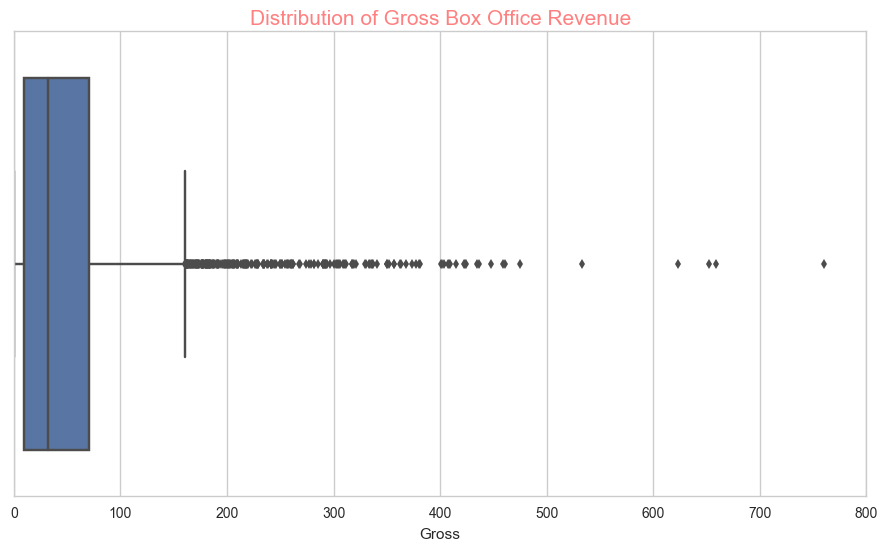

In [269]:
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(11, 6))
ax = sns.boxplot(x=df["Gross"])
ax.axes.set_title('Distribution of Gross Box Office Revenue', fontsize=15,color="r",alpha=0.5)

In [270]:
mean = df['Gross'].mean()
median = df['Gross'].median()
std = df['Gross'].std()
print('The mean is', mean)
print('The median is', median)
print('The standard deviation', std)

The mean is 54.44671578554139
The median is 31.723874
The standard deviation 70.86491298659033


## Budget vs. Gross Revenue

We first wanted to look at the relationship between Budget and Gross profit. Big Hollywood studios tend to invest millions of dollars in productions they want to see perform well. It is well known that movies with big budgets often become global blockbusters, given the amount invested in special effects, marketing & advertising, etc. 

We began by generating a standard scatterplot to visualize whether there is a relationship between Budget and Gross Revenue.

In [209]:
df_budget = df.drop(['Director','Actor 1','Actor 2','Actor 3','Genre','Country','Rating','IMDB Score','Number of Votes'], 1)
df_budget.head(5)

Year  Budget       Gross
Movie Name                                
Avatar            2009   237.0  760.505847
Titanic           1997   200.0  658.672302
Jurassic World    2015   150.0  652.177271
The Avengers      2012   220.0  623.279547
The Dark Knight   2008   185.0  533.316061

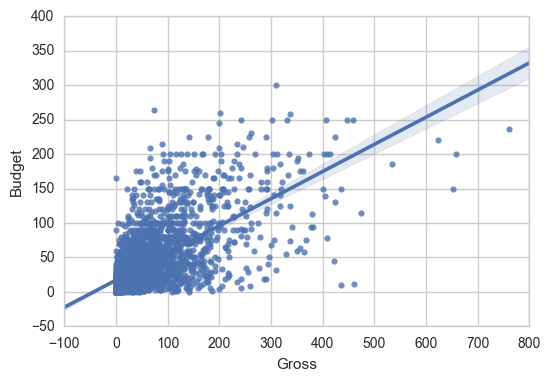

In [210]:
sns.regplot(x = 'Gross', y = 'Budget', data=df_budget)

In [211]:
from pandas.stats.api import ols
regression = ols(y=df_budget['Budget'],x=df_budget['Gross'])
regression

/Users/AnthonyEid/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning:

The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html




-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         3306
Number of Degrees of Freedom:   2

R-squared:         0.4245
Adj R-squared:     0.4243

Rmse:             32.5246

F-stat (1, 3304):  2437.3292, p-value:     0.0000

Degrees of Freedom: model 1, resid 3304

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     0.3941     0.0080      49.37     0.0000     0.3785     0.4098
     intercept    17.0559     0.7134      23.91     0.0000    15.6577    18.4542
---------------------------------End of Summary---------------------------------

We found that there is a positive correlation between budget and gross (regression line, R-squared = 0.43). This indicates that the higher the average production budget, the higher the movie's box office performance. This can be explained by a number of factors: increased spending on marketing, expensive special effects to attract a wider audience, elaborate action sequences, famous high-paid actors, etc. 

However, one issue in our data set is that we didn't account for inflation, and considering it includes movies from the 1930s onwards, it wouldn't make sense to compare old movies to newer ones. 


### Adjusting For Inflation

To take into account the inflation rate, and the fact that for this reason more recent movies will find it easier to perform better, we adjusted both budget and box office revenue for inflation.

To do so, we used historical CPI data (1913 to 2016) taken from the following website: http://www.usinflationcalculator.com/inflation/consumer-price-index-and-annual-percent-changes-from-1913-to-2008/

In [212]:
url = "/Users/AnthonyEid/Desktop/CPI_data.csv"

df_CPI = pd.read_csv(url)

print('\n', df_CPI)


      Year      Avg
0    1913    9.900
1    1914   10.000
2    1915   10.100
3    1916   10.900
4    1917   12.800
5    1918   15.100
6    1919   17.300
7    1920   20.000
8    1921   17.900
9    1922   16.800
10   1923   17.100
11   1924   17.100
12   1925   17.500
13   1926   17.700
14   1927   17.400
15   1928   17.100
16   1929   17.100
17   1930   16.700
18   1931   15.200
19   1932   13.700
20   1933   13.000
21   1934   13.400
22   1935   13.700
23   1936   13.900
24   1937   14.400
25   1938   14.100
26   1939   13.900
27   1940   14.000
28   1941   14.700
29   1942   16.300
..    ...      ...
74   1987  113.600
75   1988  118.300
76   1989  124.000
77   1990  130.700
78   1991  136.200
79   1992  140.300
80   1993  144.500
81   1994  148.200
82   1995  152.400
83   1996  156.900
84   1997  160.500
85   1998  163.000
86   1999  166.600
87   2000  172.200
88   2001  177.100
89   2002  179.900
90   2003  184.000
91   2004  188.900
92   2005  195.300
93   2006  201.600
94   2007 

In [213]:
df_CPI.head()

Year   Avg
0  1913   9.9
1  1914  10.0
2  1915  10.1
3  1916  10.9
4  1917  12.8

In [214]:
df_CPI.columns = ['Year','CPI Avg']

In [215]:
df_budget = df_budget.reset_index()
df_inflation = pd.merge(df_budget, df_CPI, on='Year')
df_inflation.head()

Movie Name  Year  Budget       Gross  CPI Avg
0                                  Avatar   2009   237.0  760.505847  214.537
1     Transformers: Revenge of the Fallen   2009   200.0  402.076689  214.537
2  Harry Potter and the Half-Blood Prince   2009   250.0  301.956980  214.537
3             The Twilight Saga: New Moon   2009    50.0  296.623634  214.537
4                                      Up   2009   175.0  292.979556  214.537

In [216]:
df_inflation = df_inflation.set_index("Movie Name")

In [217]:
df_inflation = df_inflation.sort_values('Year', ascending=False).iloc[:6000]
df_inflation.head(5)

Year  Budget      Gross  CPI Avg
Movie Name                                                     
Money Monster                  2016    27.0  41.008532  240.007
Hail, Caesar!                  2016    22.0  29.997095  240.007
Lights Out                     2016     4.9  56.536016  240.007
Bad Moms                       2016    20.0  55.461307  240.007
Neighbors 2: Sorority Rising   2016    35.0  55.291815  240.007

In [218]:
df_inflation = df_inflation[pd.notnull(df_inflation['Gross'])]
df_inflation = df_inflation[pd.notnull(df_inflation['Budget'])]

In [219]:
df_inflation.tail()

Year  Budget     Gross  CPI Avg
Movie Name                                                      
Modern Times                     1936   1.500  0.163245     13.9
Top Hat                          1935   0.609  3.000000     13.7
42nd Street                      1933   0.439  2.300000     13.0
The Broadway Melody              1929   0.379  2.808000     17.1
Over the Hill to the Poorhouse   1920   0.100  3.000000     20.0

To find the values of Gross and Budget in 2016 dollars, we need to adjust for inflation using the CPI yearly average. The CPI for 2016 is 240.007

In [220]:
df_inflation["Budget In 2016 $"] = (240.007/df_inflation["CPI Avg"])*df_inflation["Budget"]
df_inflation.head()

Year  Budget      Gross  CPI Avg  \
Movie Name                                                        
Money Monster                  2016    27.0  41.008532  240.007   
Hail, Caesar!                  2016    22.0  29.997095  240.007   
Lights Out                     2016     4.9  56.536016  240.007   
Bad Moms                       2016    20.0  55.461307  240.007   
Neighbors 2: Sorority Rising   2016    35.0  55.291815  240.007   

                               Budget In 2016 $  
Movie Name                                       
Money Monster                              27.0  
Hail, Caesar!                              22.0  
Lights Out                                  4.9  
Bad Moms                                   20.0  
Neighbors 2: Sorority Rising               35.0

To find box office grosses equivalent to 2016, we adjusted for inflation and population growth

In [221]:
df_inflation["Gross In 2016 $"] = (240.007/df_inflation["CPI Avg"])*df_inflation["Gross"]
df_inflation.tail(15)

Year    Budget       Gross  CPI Avg  \
Movie Name                                                              
Annie Get Your Gun                1950  3.768785    8.000000     24.1   
The Pirate                        1948  3.700000    2.956000     24.1   
The Lady from Shanghai            1947  2.300000    0.007927     22.3   
Duel in the Sun                   1946  8.000000   20.400000     19.5   
The Best Years of Our Lives       1946  2.100000   23.650000     19.5   
Pinocchio                         1940  2.600000   84.300000     14.0   
Fantasia                          1940  2.280000   76.400000     14.0   
Gone with the Wind                1939  3.977000  198.655278     13.9   
The Wizard of Oz                  1939  2.800000   22.202612     13.9   
Snow White and the Seven Dwarfs   1937  2.000000  184.925485     14.4   
Modern Times                      1936  1.500000    0.163245     13.9   
Top Hat                           1935  0.609000    3.000000     13.7   
42nd Street                       1933  0.439000    2.300000     13.0   
The Broadway Melody               1929  0.379000    2.808000     17.1   
Over the Hill to the Poorhouse    1920  0.100000    3.000000     20.0   

                                  Budget In 2016 $  Gross In 2016 $  
Movie Name                                                           
Annie Get Your Gun                       37.532564        79.670373  
The Pirate                               36.847548        29.438203  
The Lady from Shanghai                   24.754085         0.085315  
Duel in the Sun                          98.464410       251.084246  
The Best Years of Our Lives              25.846908       291.085413  
Pinocchio                                44.572729      1445.185007  
Fantasia                                 39.086854      1309.752486  
Gone with the Wind                       68.669629      3430.119231  
The Wizard of Oz                         48.346734       383.365633  
Snow White and the Seven Dwarfs          33.334306      3082.181311  
Modern Times                             25.900036         2.818701  
Top Hat                                  10.668924        52.556277  
42nd Street                               8.104852        42.462777  
The Broadway Melody                       5.319453        39.411676  
Over the Hill to the Poorhouse            1.200035        36.001050

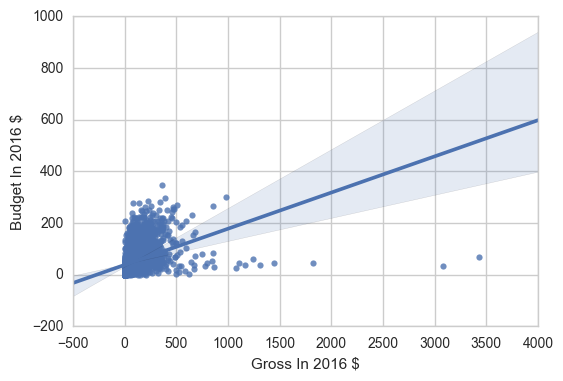

In [222]:
sns.regplot(x = 'Gross In 2016 $', y = 'Budget In 2016 $', data=df_inflation)

In [223]:
from pandas.stats.api import ols
regression = ols(y=df_inflation['Budget In 2016 $'],x=df_inflation['Gross In 2016 $'])
regression

/Users/AnthonyEid/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning:

The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html




-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         3306
Number of Degrees of Freedom:   2

R-squared:         0.1538
Adj R-squared:     0.1535

Rmse:             45.9424

F-stat (1, 3304):   600.4033, p-value:     0.0000

Degrees of Freedom: model 1, resid 3304

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     0.1400     0.0057      24.50     0.0000     0.1288     0.1512
     intercept    37.8828     0.9176      41.28     0.0000    36.0843    39.6813
---------------------------------End of Summary---------------------------------

We find that correlation is lower now. Why? Let's try to eliminate outliers. 

In [224]:
df_inflation1 = df_inflation[((df_inflation['Gross In 2016 $'] - df_inflation['Gross In 2016 $'].mean()) / df_inflation['Gross In 2016 $'].std()).abs() < 3]

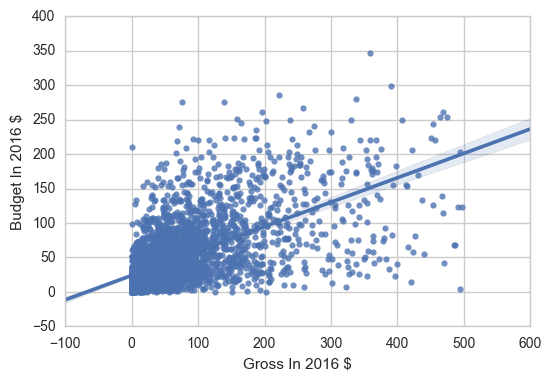

In [225]:
sns.regplot(x = 'Gross In 2016 $', y = 'Budget In 2016 $', data=df_inflation1)

In [226]:
from pandas.stats.api import ols
regression = ols(y=df_inflation1['Budget In 2016 $'],x=df_inflation1['Gross In 2016 $'])
regression

/Users/AnthonyEid/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning:

The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html




-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         3268
Number of Degrees of Freedom:   2

R-squared:         0.3620
Adj R-squared:     0.3618

Rmse:             39.3802

F-stat (1, 3266):  1852.9098, p-value:     0.0000

Degrees of Freedom: model 1, resid 3266

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     0.3542     0.0082      43.05     0.0000     0.3380     0.3703
     intercept    23.9459     0.8940      26.79     0.0000    22.1937    25.6982
---------------------------------End of Summary---------------------------------

In elimating outliers, our R-squared increased from 0.15 to 0.36, but this is still a lower correlation from the one we found prior to adjusting for inflation (0.43).

Over time, movie tastes would have changed, meaning the characteristics of a profitable movie would have also changed, so it didn't make sense for us to compare movies from significantly different eras. 

### Focusing on data post-2000

Instead of adjusting for inflation, we chose to simply focus on movies post-2000. This time period restriction was  placed so that gross revenue comparisons wouldn’t be significantly impacted by the rates of inflation, and to account for changes in movie-going habits. 

In [227]:
df_budget = df_budget.sort_values('Year', ascending=False).iloc[:6000]
df_budget.head()

Movie Name  Year  Budget       Gross
1517                The Boy   2016    10.0   35.794166
479   The Angry Birds Movie   2016    73.0  107.225164
255       X-Men: Apocalypse   2016   178.0  154.985087
368    Central Intelligence   2016    50.0  126.088877
1678          Gods of Egypt   2016   140.0   31.141074

In [228]:
yearlist = range(2000,2017)
df_newbudget = df_budget[df_budget['Year'].isin(yearlist)]
df_newbudget.tail()

Movie Name  Year  Budget       Gross
1287     The Replacements   2000    50.0   44.737059
370       Erin Brockovich   2000    52.0  125.548685
2780  Requiem for a Dream   2000     4.5    3.609278
2753              Whipped   2000     3.0    4.142507
1944           Titan A.E.   2000    75.0   22.751979

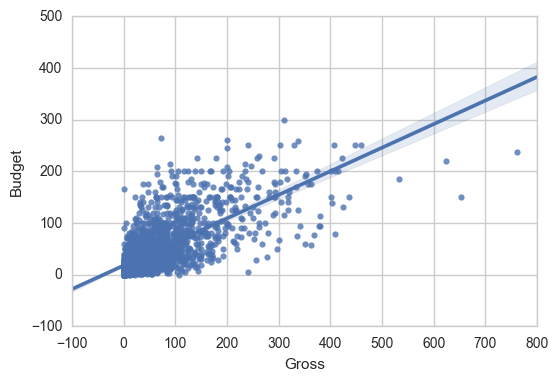

In [229]:
sns.regplot(x = 'Gross', y = 'Budget', data=df_newbudget)

In [230]:
regression = ols(y=df_newbudget['Budget'],x=df_newbudget['Gross'])
regression

/Users/AnthonyEid/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning:

The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html




-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         2364
Number of Degrees of Freedom:   2

R-squared:         0.5098
Adj R-squared:     0.5096

Rmse:             32.9062

F-stat (1, 2362):  2456.5680, p-value:     0.0000

Degrees of Freedom: model 1, resid 2362

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     0.4561     0.0092      49.56     0.0000     0.4381     0.4742
     intercept    17.7295     0.8485      20.90     0.0000    16.0666    19.3925
---------------------------------End of Summary---------------------------------

We now found that the R-squared increased to 0.51, showing a relatively strong correlation between budget and box office grosses, confirming our initital hypothesis that higher production costs, on average, lead to higher revenues (given the amount invested in star power, marketing, etc.) 

### Budget Ranges

To better visualize this relationship, we grouped different budget ranges into buckets (0-1, 1-10, 10-50, 50-100, 100-150, and 150-300) and generated a bar chart of gross revenues.

In [231]:
df_budget = df_budget.sort_values('Budget', ascending=False).iloc[:6000]
df_budget.head()

Movie Name  Year  Budget       Gross
48   Pirates of the Caribbean: At World's End   2007   300.0  309.404152
786                               John Carter   2012   263.7   73.058679
147                                   Tangled   2010   260.0  200.807262
35                               Spider-Man 3   2007   258.0  336.530303
17                 Captain America: Civil War   2016   250.0  407.197282

In [232]:
df_budget.tail()

Movie Name  Year    Budget     Gross
3295          Newlyweds   2011  0.009000  0.004584
2896        El Mariachi   1992  0.007000  2.040920
3067             Primer   2004  0.007000  0.424760
3197  My Date with Drew   2004  0.001100  0.085222
3038          Tarnation   2003  0.000218  0.592014

In [233]:
bins = [0,1,10,50,100,150,301]
group_names = ['0-1','1-10','10-50','50-100','100-150','150-300']
categories = pd.cut(df_budget['Budget'], bins, labels=group_names)
df_budget['Avg Budget'] = pd.cut(df_budget['Budget'], bins, labels=group_names)
categories.head(5)

48     150-300
786    150-300
147    150-300
35     150-300
17     150-300
Name: Budget, dtype: category
Categories (6, object): [0-1 < 1-10 < 10-50 < 50-100 < 100-150 < 150-300]

In [234]:
df_budget.tail()

Movie Name  Year    Budget     Gross Avg Budget
3295          Newlyweds   2011  0.009000  0.004584        0-1
2896        El Mariachi   1992  0.007000  2.040920        0-1
3067             Primer   2004  0.007000  0.424760        0-1
3197  My Date with Drew   2004  0.001100  0.085222        0-1
3038          Tarnation   2003  0.000218  0.592014        0-1

In [235]:
pd.value_counts(df_budget['Avg Budget'])

10-50      1606
1-10        690
50-100      551
0-1         195
100-150     165
150-300      99
Name: Avg Budget, dtype: int64

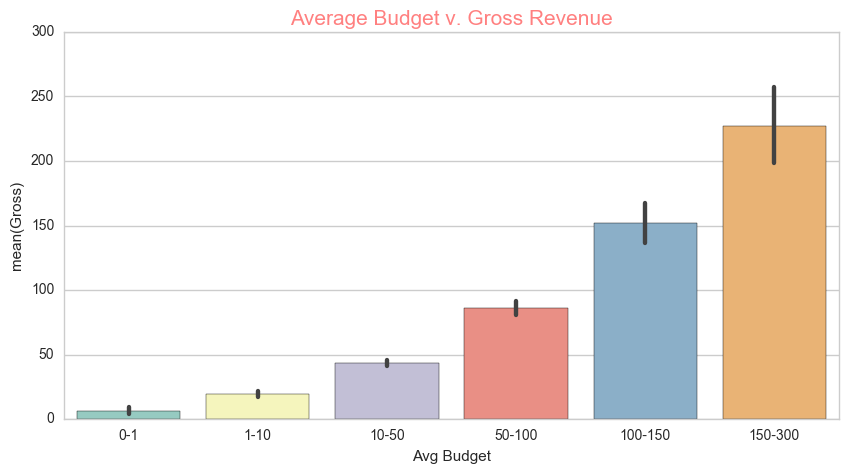

In [236]:
f, ax = plt.subplots(figsize=(10, 5))
Budget = sns.barplot(x="Avg Budget", y="Gross", data=df_budget, palette="Set3")
Budget.axes.set_title('Average Budget v. Gross Revenue', fontsize=15,color="r",alpha=0.5)

As can be seen above, the higher the budget range, the more financially successful movies are, on average. 

## IMDB Rating vs. Gross Revenue


Next, we chose to look at the relationship between the IMDB Score and Gross Revenue. The IMBD score is a weighted average of votes the movie recieved by IMDB users. It is meant to reflect how the general public recieves a movie. 

Understanding this relationship is important because it can highlight whether the quality of the movie produced should be considered. Although, scores are tallied after  the movie is initially released, many people will look to the rating to decide what film to watch which will likely impact how profitable a movie is after the initial opening weekend.

In [237]:
df.head()

Director            Actor 1  \
Movie Name                                               
Avatar                James Cameron   Joel David Moore   
Titanic               James Cameron       Kate Winslet   
Jurassic World      Colin Trevorrow         Judy Greer   
The Avengers            Joss Whedon  Robert Downey Jr.   
The Dark Knight   Christopher Nolan       Heath Ledger   

                                             Genre              Actor 2  \
Movie Name                                                                
Avatar             Action|Adventure|Fantasy|Sci-Fi          CCH Pounder   
Titanic                              Drama|Romance    Leonardo DiCaprio   
Jurassic World    Action|Adventure|Sci-Fi|Thriller  Bryce Dallas Howard   
The Avengers               Action|Adventure|Sci-Fi      Chris Hemsworth   
The Dark Knight        Action|Crime|Drama|Thriller       Christian Bale   

                  Number of Votes             Actor 3 Country Rating  Year  \
Movie Name                                                                   
Avatar                     886204           Wes Studi     USA  PG-13  2009   
Titanic                    793059       Gloria Stuart     USA  PG-13  1997   
Jurassic World             418214             Omar Sy     USA  PG-13  2015   
The Avengers               995415  Scarlett Johansson     USA  PG-13  2012   
The Dark Knight           1676169      Morgan Freeman     USA  PG-13  2008   

                  IMDB Score  Budget       Gross  
Movie Name                                        
Avatar                   7.9   237.0  760.505847  
Titanic                  7.7   200.0  658.672302  
Jurassic World           7.0   150.0  652.177271  
The Avengers             8.1   220.0  623.279547  
The Dark Knight          9.0   185.0  533.316061

In [238]:
df_review = df.drop(['Director','Actor 1','Actor 2','Actor 3','Genre','Rating','Year','Budget','Country'], 1)

In [239]:
df_review.head()

Number of Votes  IMDB Score       Gross
Movie Name                                               
Avatar                     886204         7.9  760.505847
Titanic                    793059         7.7  658.672302
Jurassic World             418214         7.0  652.177271
The Avengers               995415         8.1  623.279547
The Dark Knight           1676169         9.0  533.316061

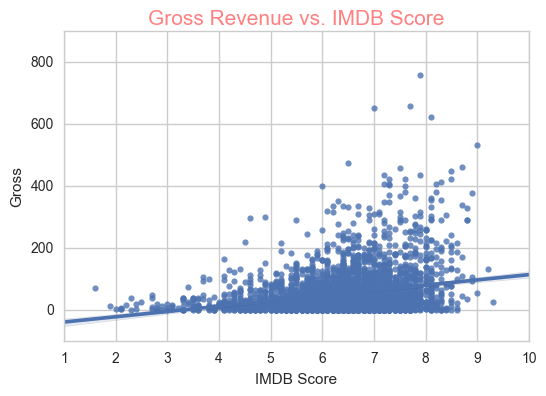

In [240]:
IMDB = sns.regplot(y="Gross", x="IMDB Score", data=df_review)
IMDB.axes.set_title('Gross Revenue vs. IMDB Score', fontsize=15,color="r",alpha=0.5)

In [241]:
regression_IMBD = ols(x=df_review['IMDB Score'],y=df_review['Gross'])
regression_IMBD

/Users/AnthonyEid/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning:

The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html




-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         3306
Number of Degrees of Freedom:   2

R-squared:         0.0634
Adj R-squared:     0.0631

Rmse:             68.5911

F-stat (1, 3304):   223.7561, p-value:     0.0000

Degrees of Freedom: model 1, resid 3304

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x    16.9866     1.1356      14.96     0.0000    14.7609    19.2124
     intercept   -54.7646     7.3978      -7.40     0.0000   -69.2643   -40.2650
---------------------------------End of Summary---------------------------------

In [243]:
bins = [0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5]
group_names = [1,2,3,4,5,6,7,8,9]
categories2 = pd.cut(df_review['IMDB Score'], bins, labels=group_names)
df_review['Avg_Score'] = pd.cut(df_review['IMDB Score'], bins, labels=group_names)
categories2.head()

Movie Name
Avatar              8
Titanic             8
Jurassic World      7
The Avengers        8
The Dark Knight     9
Name: IMDB Score, dtype: category
Categories (9, int64): [1 < 2 < 3 < 4 ... 6 < 7 < 8 < 9]

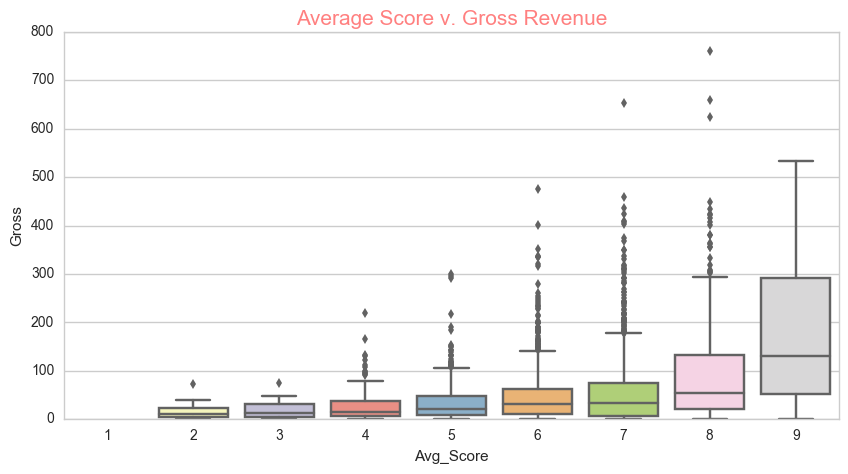

In [272]:
f, ax = plt.subplots(figsize=(10, 5))
AvgScore = sns.boxplot(x="Avg_Score", y="Gross", data=df_review, palette="Set3")
AvgScore.axes.set_title('Average Score v. Gross Revenue', fontsize=15,color="r",alpha=0.5)

The R-Squared indicates that there is very little relationship between IMDB scores and gross revenue. However, the box plot shows that movies that are ranked highly still tend to generate higher revenues. The outliers highlight that the the highest grossing movies don't necessarily have the highest scores.

In [274]:
df_review.head(10)

Number of Votes  IMDB Score  \
Movie Name                                                                
Avatar                                               886204         7.9   
Titanic                                              793059         7.7   
Jurassic World                                       418214         7.0   
The Avengers                                         995415         8.1   
The Dark Knight                                     1676169         9.0   
Star Wars: Episode I - The Phantom Menace            534658         6.5   
Star Wars: Episode IV - A New Hope                   911097         8.7   
Avengers: Age of Ultron                              462669         7.5   
The Dark Knight Rises                               1144337         8.5   
Shrek 2                                              314630         7.2   

                                                 Gross Avg_Score  
Movie Name                                                        
Avatar                                      760.505847         8  
Titanic                                     658.672302         8  
Jurassic World                              652.177271         7  
The Avengers                                623.279547         8  
The Dark Knight                             533.316061         9  
Star Wars: Episode I - The Phantom Menace   474.544677         6  
Star Wars: Episode IV - A New Hope          460.935665         9  
Avengers: Age of Ultron                     458.991599         7  
The Dark Knight Rises                       448.130642         8  
Shrek 2                                     436.471036         7

This statement is supported by quickly looking at the top 10 grossing movies from our dataset. Of the 10 only two recieved a score in the 9 range. 

Regardless, on average, highly rated movies tend to have higher gross revenues.

## Rating vs. Gross Revenue

In [58]:
df_rating = df.drop(['Director','Actor 1','Actor 2','Actor 3','Country','Genre','Year','Budget','IMDB Score'],1)
df_rating.head(5)

Number of Votes Rating       Gross
Movie Name                                          
Avatar                     886204  PG-13  760.505847
Titanic                    793059  PG-13  658.672302
Jurassic World             418214  PG-13  652.177271
The Avengers               995415  PG-13  623.279547
The Dark Knight           1676169  PG-13  533.316061

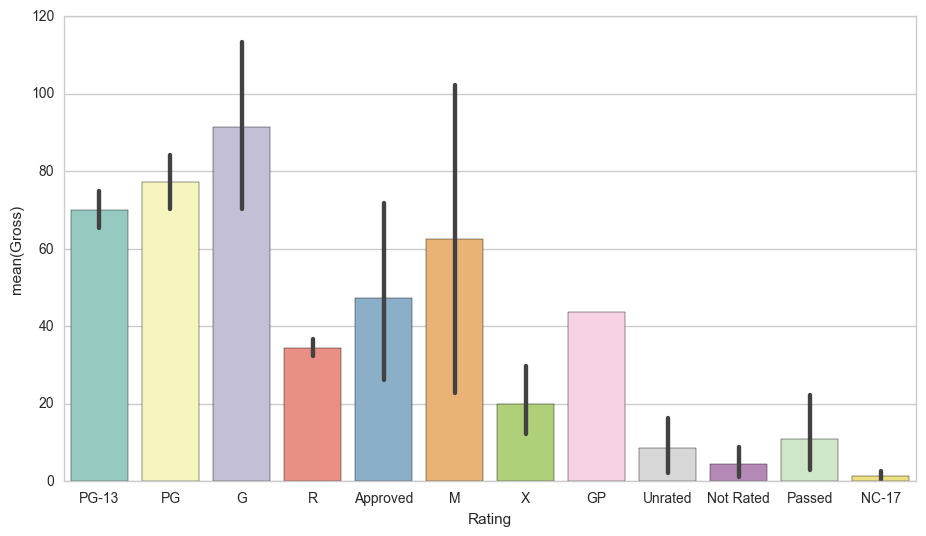

In [246]:
f, ax = plt.subplots(figsize=(11, 6))
Rating = sns.barplot(x="Rating", y="Gross", data=df,palette="Set3")

Since the 1980s, the MPAA has only used the following ratings, which we are going to focus on:
    
    G – General Audiences
    PG – Parental Guidance Suggested
    PG-13 – Parents Strongly Cautioned
    R – Restricted
    NC-17 – Adults Only

In [60]:
value_list = ['PG-13','PG','R','G','NC-17']
df_rating = df_rating[df_rating.Rating.isin(value_list)]
df_rating.head()

Number of Votes Rating       Gross
Movie Name                                          
Avatar                     886204  PG-13  760.505847
Titanic                    793059  PG-13  658.672302
Jurassic World             418214  PG-13  652.177271
The Avengers               995415  PG-13  623.279547
The Dark Knight           1676169  PG-13  533.316061

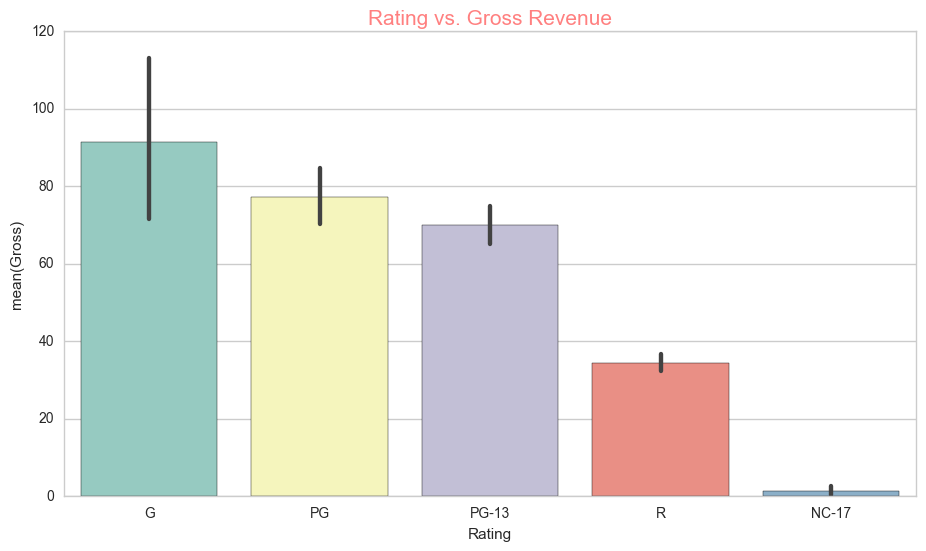

In [61]:
f, ax = plt.subplots(figsize=(11, 6))
Rating = sns.barplot(x="Rating", y="Gross", data=df_rating, order=['G','PG','PG-13','R','NC-17'], palette="Set3")
Rating.axes.set_title('Rating vs. Gross Revenue', fontsize=15,color="r",alpha=0.5)

We found that, on average, movies with a G-rating tend to perform best. This can be explained by the fact that movies rated G attract a wider range of audiences, given that they doesn't place any age restrictions. The more restrictive the rating is, the lower the average box office revenues are.

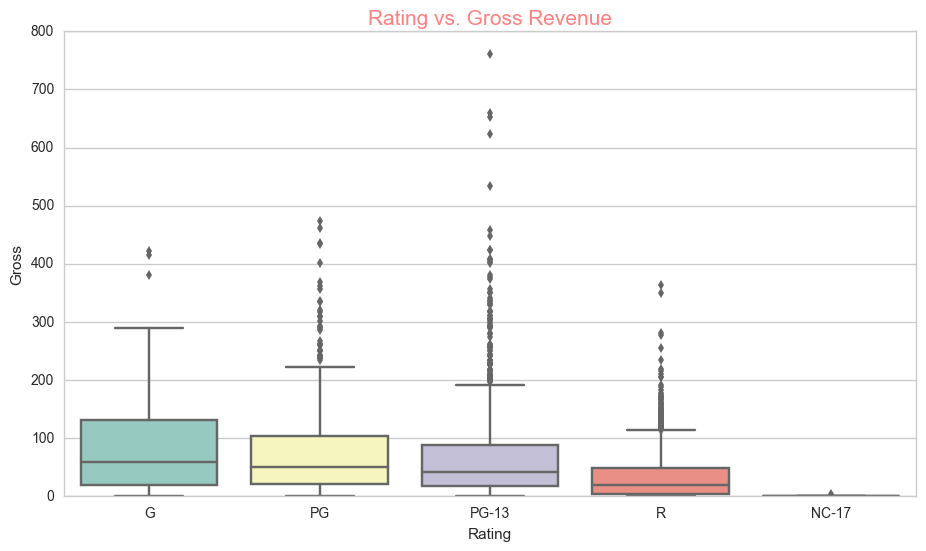

In [251]:
f, ax = plt.subplots(figsize=(11, 6))
Rating = sns.boxplot(x="Rating", y="Gross", data=df_rating, order=['G','PG','PG-13','R','NC-17'], palette="Set3")
Rating.axes.set_title('Rating vs. Gross Revenue', fontsize=15,color="r",alpha=0.5)

While age restrictions tend to lower average grosses, Hollywood's highest grossing productions have often been rated PG-13. It’s not a coincidence that most films are rated PG-13. Not just because they’re the most lucrative, but because, according to [The Wrap](http://www.thewrap.com/pg-13-vs-r-movies-how-each-rating-stacks-up-at-the-box-office/), "life is unrated, and telling a story right frequently requires including sex or violence. Try to find a G-rated war movie, for example."

## Genre vs. Gross Revenues

We then tried to look at different movie genres, to see whether they affect box office receipts. 
One issue, however, is that our data sets categorized the movies under multiple combinations of genres, making it difficult to analyze each one seperately. A little manipulation allowed us to fix this problem.

In [253]:
df['Genre'].head()

Movie Name
Avatar               Action|Adventure|Fantasy|Sci-Fi
Titanic                                Drama|Romance
Jurassic World      Action|Adventure|Sci-Fi|Thriller
The Avengers                 Action|Adventure|Sci-Fi
The Dark Knight          Action|Crime|Drama|Thriller
Name: Genre, dtype: object

In [254]:
df_genre = df['Genre'].str.split('|', expand=True).astype(str)
df_genre.head()

0          1        2         3     4     5     6     7
Movie Name                                                                    
Avatar            Action  Adventure  Fantasy    Sci-Fi  None  None  None  None
Titanic            Drama    Romance     None      None  None  None  None  None
Jurassic World    Action  Adventure   Sci-Fi  Thriller  None  None  None  None
The Avengers      Action  Adventure   Sci-Fi      None  None  None  None  None
The Dark Knight   Action      Crime    Drama  Thriller  None  None  None  None

In [255]:
df_genre.columns = ['Genre1','Genre2','Genre3','Genre4','Genre5','Genre6','Genre7','Genre8']

In [256]:
df_gross = df.drop(['Director','Actor 1','Actor 2','Actor 3','Genre','Number of Votes','Country','Rating','Budget','IMDB Score','Year'], 1)
df_gross.head(10)

Gross
Movie Name                                            
Avatar                                      760.505847
Titanic                                     658.672302
Jurassic World                              652.177271
The Avengers                                623.279547
The Dark Knight                             533.316061
Star Wars: Episode I - The Phantom Menace   474.544677
Star Wars: Episode IV - A New Hope          460.935665
Avengers: Age of Ultron                     458.991599
The Dark Knight Rises                       448.130642
Shrek 2                                     436.471036

In [257]:
df_genre = pd.concat([df_gross, df_genre], axis=1)
df_genre.head()

Gross  Genre1     Genre2   Genre3    Genre4 Genre5  \
Movie Name                                                                  
Avatar            760.505847  Action  Adventure  Fantasy    Sci-Fi   None   
Titanic           658.672302   Drama    Romance     None      None   None   
Jurassic World    652.177271  Action  Adventure   Sci-Fi  Thriller   None   
The Avengers      623.279547  Action  Adventure   Sci-Fi      None   None   
The Dark Knight   533.316061  Action      Crime    Drama  Thriller   None   

                 Genre6 Genre7 Genre8  
Movie Name                             
Avatar             None   None   None  
Titanic            None   None   None  
Jurassic World     None   None   None  
The Avengers       None   None   None  
The Dark Knight    None   None   None

In [258]:
df_genre = df_genre.reset_index()
df_genre.head()

Movie Name       Gross  Genre1     Genre2   Genre3    Genre4 Genre5  \
0           Avatar   760.505847  Action  Adventure  Fantasy    Sci-Fi   None   
1          Titanic   658.672302   Drama    Romance     None      None   None   
2   Jurassic World   652.177271  Action  Adventure   Sci-Fi  Thriller   None   
3     The Avengers   623.279547  Action  Adventure   Sci-Fi      None   None   
4  The Dark Knight   533.316061  Action      Crime    Drama  Thriller   None   

  Genre6 Genre7 Genre8  
0   None   None   None  
1   None   None   None  
2   None   None   None  
3   None   None   None  
4   None   None   None

In [259]:
df_genre.columns = ['Movie Name','Gross','Genre1','Genre2','Genre3','Genre4','Genre5','Genre6','Genre7','Genre8']
df_genre.head()

Movie Name       Gross  Genre1     Genre2   Genre3    Genre4 Genre5  \
0           Avatar   760.505847  Action  Adventure  Fantasy    Sci-Fi   None   
1          Titanic   658.672302   Drama    Romance     None      None   None   
2   Jurassic World   652.177271  Action  Adventure   Sci-Fi  Thriller   None   
3     The Avengers   623.279547  Action  Adventure   Sci-Fi      None   None   
4  The Dark Knight   533.316061  Action      Crime    Drama  Thriller   None   

  Genre6 Genre7 Genre8  
0   None   None   None  
1   None   None   None  
2   None   None   None  
3   None   None   None  
4   None   None   None

In [260]:
df_genre.set_index(['Movie Name','Gross'],inplace=True)

In [261]:
df_genre = df_genre.stack()

In [262]:
df_genre = pd.DataFrame(df_genre, columns = ['Genre'])

df_genre.groupby(df_genre['Genre'])
df_genre.head(10)

Genre
Movie Name Gross                       
Avatar     760.505847 Genre1     Action
                      Genre2  Adventure
                      Genre3    Fantasy
                      Genre4     Sci-Fi
                      Genre5       None
                      Genre6       None
                      Genre7       None
                      Genre8       None
Titanic    658.672302 Genre1      Drama
                      Genre2    Romance

In [263]:
df_genre.reset_index(inplace=True) 
df_genre.head()

Movie Name       Gross level_2      Genre
0    Avatar   760.505847  Genre1     Action
1    Avatar   760.505847  Genre2  Adventure
2    Avatar   760.505847  Genre3    Fantasy
3    Avatar   760.505847  Genre4     Sci-Fi
4    Avatar   760.505847  Genre5       None

In [264]:
pd.value_counts(df_genre['Genre'])

None           16677
Drama           1619
Comedy          1354
Thriller         933
Action           802
Romance          763
Adventure        686
Crime            608
Fantasy          444
Sci-Fi           425
Family           400
Horror           327
Mystery          321
Biography        204
Animation        172
Music            146
Sport            136
History          115
War              111
Musical           94
Documentary       57
Western           51
Short              2
Film-Noir          1
Name: Genre, dtype: int64

In [266]:
vlist = ['Action', 'Adventure','Fantasy','Drama','Romance','Thriller','Crime','Animation','Comedy','Family','Musical','Biography','History','War','Mystery','Horror','Sport','Music','Western','Documentary']
df_genre = df_genre[df_genre['Genre'].isin(vlist)]

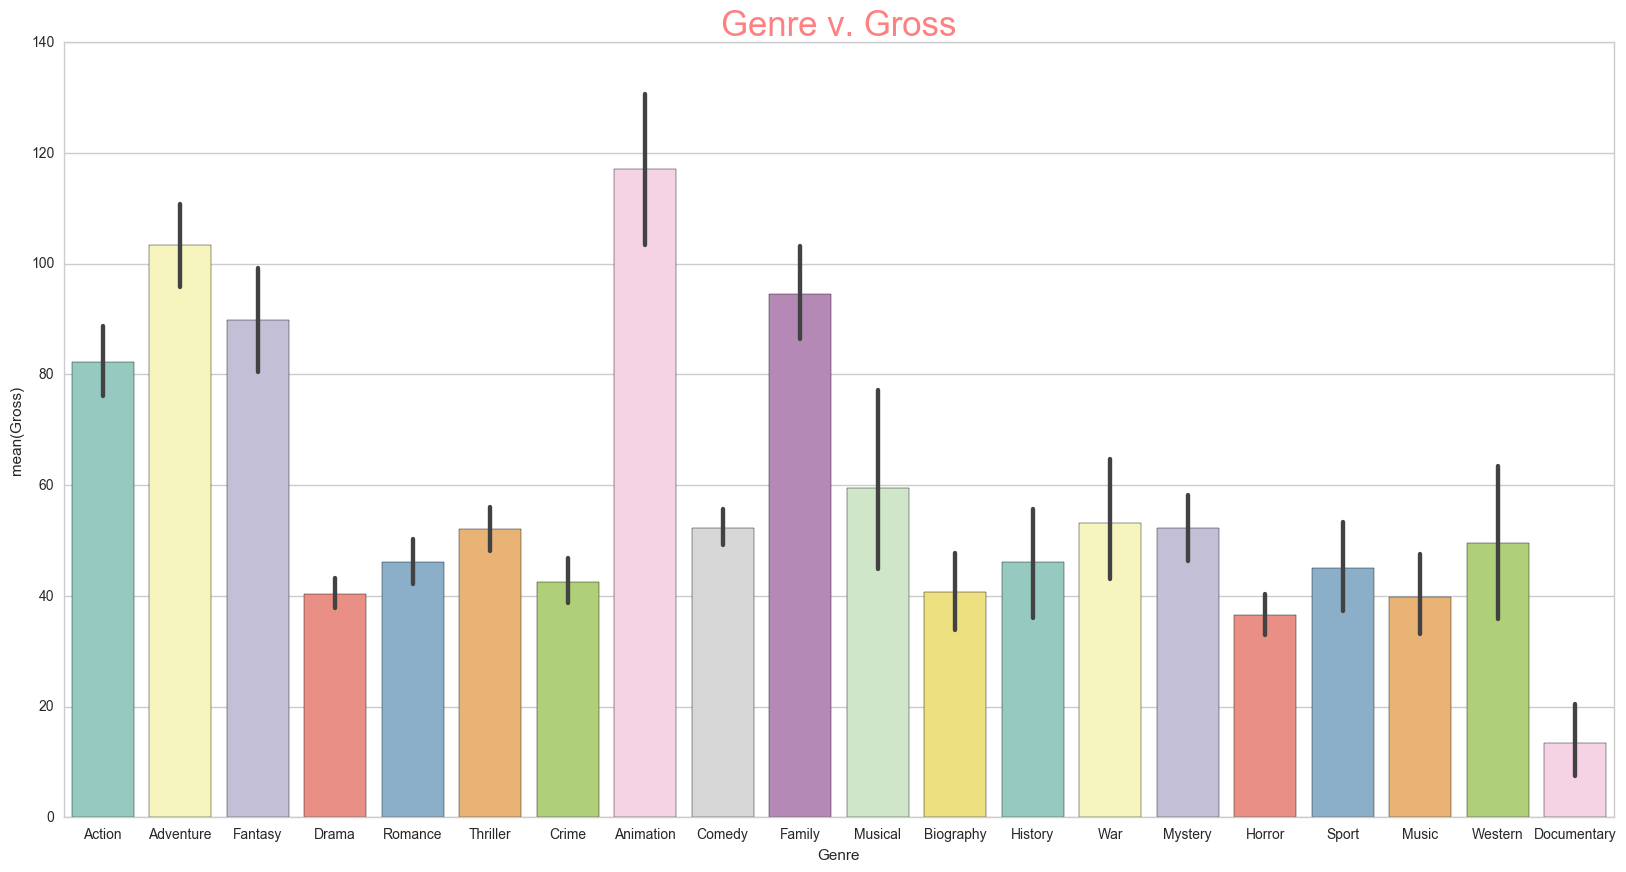

In [284]:
f, ax = plt.subplots(figsize=(20, 10))
Genre = sns.barplot(x="Genre", y="Gross", data=df_genre, palette="Set3")
Genre.axes.set_title('Genre v. Gross', fontsize=25,color="r",alpha=0.5)

We found that Animation movies tend to gross the most, followed by Family, Fantasy, Adventure and Action. 

Animation and Family movies attract a wider pool of people given their non-restrictive G rating (animation movies are also geared towards kids who are most often accompanied by guardians, doubling the revenue). 

Action, Adventure and Fantasy movies, on the other hand, provide more of a movie-going experience (special effects, elaborate action scenes, etc.), not only attracting more people, but also charging more per ticket (IMAX or 3D movies tend to be more expensive). Further, these types of movies are often big-budget Hollywood productions, which ties back to our first conclusion that big budget films tend to generate higher revenues. 

However, outside of the top 5, there is very little variation in the average revenue for all other genres. This indicates that, unless you are in the top 5, the genre of the movie will probably not impact how succesful it is domestically. 

## Director Popularity vs. Gross Revenues

Our dataset does not contain any indicators of director popularity (the "Facebook Likes" column contains too many wrong or missing values). Therefore, we focused on the ones who directed the highest number of movies. Studios only hire directors to direct again if their movies have been successful in the past or if they are famous, with the hopes that the director will repeat his or her success or the value of their celebrity will attract enough attention to the movie to generate profit. 

In [275]:
df.head()

Director            Actor 1  \
Movie Name                                               
Avatar                James Cameron   Joel David Moore   
Titanic               James Cameron       Kate Winslet   
Jurassic World      Colin Trevorrow         Judy Greer   
The Avengers            Joss Whedon  Robert Downey Jr.   
The Dark Knight   Christopher Nolan       Heath Ledger   

                                             Genre              Actor 2  \
Movie Name                                                                
Avatar             Action|Adventure|Fantasy|Sci-Fi          CCH Pounder   
Titanic                              Drama|Romance    Leonardo DiCaprio   
Jurassic World    Action|Adventure|Sci-Fi|Thriller  Bryce Dallas Howard   
The Avengers               Action|Adventure|Sci-Fi      Chris Hemsworth   
The Dark Knight        Action|Crime|Drama|Thriller       Christian Bale   

                  Number of Votes             Actor 3 Country Rating  Year  \
Movie Name                                                                   
Avatar                     886204           Wes Studi     USA  PG-13  2009   
Titanic                    793059       Gloria Stuart     USA  PG-13  1997   
Jurassic World             418214             Omar Sy     USA  PG-13  2015   
The Avengers               995415  Scarlett Johansson     USA  PG-13  2012   
The Dark Knight           1676169      Morgan Freeman     USA  PG-13  2008   

                  IMDB Score  Budget       Gross  
Movie Name                                        
Avatar                   7.9   237.0  760.505847  
Titanic                  7.7   200.0  658.672302  
Jurassic World           7.0   150.0  652.177271  
The Avengers             8.1   220.0  623.279547  
The Dark Knight          9.0   185.0  533.316061

In [276]:
df_director = df.drop(['Actor 1','Actor 2','Actor 3','Number of Votes','Genre','Country','Rating','IMDB Score','Budget','Year'], 1)
df_director.head()

Director       Gross
Movie Name                                     
Avatar                James Cameron  760.505847
Titanic               James Cameron  658.672302
Jurassic World      Colin Trevorrow  652.177271
The Avengers            Joss Whedon  623.279547
The Dark Knight   Christopher Nolan  533.316061

In [277]:
df_director['Value Counts'] = df_director.groupby('Director')['Director'].transform('count')
df_director.head()

Director       Gross  Value Counts
Movie Name                                                   
Avatar                James Cameron  760.505847             7
Titanic               James Cameron  658.672302             7
Jurassic World      Colin Trevorrow  652.177271             2
The Avengers            Joss Whedon  623.279547             3
The Dark Knight   Christopher Nolan  533.316061             8

In [278]:
df_director['Director'].value_counts()

Steven Spielberg         24
Clint Eastwood           19
Woody Allen              17
Ridley Scott             16
Martin Scorsese          16
Spike Lee                15
Renny Harlin             14
Tim Burton               14
Steven Soderbergh        14
Robert Zemeckis          13
Barry Levinson           13
Ron Howard               13
Michael Bay              12
Robert Rodriguez         12
Rob Reiner               11
Richard Linklater        11
Shawn Levy               11
Oliver Stone             11
Tony Scott               10
David Fincher            10
Wes Craven               10
Chris Columbus           10
Kevin Smith              10
John Carpenter           10
Joel Schumacher          10
Bobby Farrelly            9
Sam Raimi                 9
Dennis Dugan              9
M. Night Shyamalan        9
Francis Ford Coppola      9
                         ..
Joshua Michael Stern      1
Michael Radford           1
Joshua Tickell            1
Rob Hedden                1
Norman Ferguson     

In [279]:
df_director[df_director['Director'].str.contains("Steven Spielberg",na=False)].head()

Director  \
Movie Name                                                             
E.T. the Extra-Terrestrial                          Steven Spielberg   
Jurassic Park                                       Steven Spielberg   
Indiana Jones and the Kingdom of the Crystal Sk...  Steven Spielberg   
Jaws                                                Steven Spielberg   
Raiders of the Lost Ark                             Steven Spielberg   

                                                         Gross  Value Counts  
Movie Name                                                                    
E.T. the Extra-Terrestrial                          434.949459            24  
Jurassic Park                                       356.784000            24  
Indiana Jones and the Kingdom of the Crystal Sk...  317.011114            24  
Jaws                                                260.000000            24  
Raiders of the Lost Ark                             242.374454            24

In [280]:
bins = [0,12,30]
group_names = ['Less than 12','More than 12']
categories = pd.cut(df_director['Value Counts'], bins, labels=group_names)
df_director['Popularity of Director'] = pd.cut(df_director['Value Counts'], bins, labels=group_names)
categories.head(5)

Movie Name
Avatar              Less than 12
Titanic             Less than 12
Jurassic World      Less than 12
The Avengers        Less than 12
The Dark Knight     Less than 12
Name: Value Counts, dtype: category
Categories (2, object): [Less than 12 < More than 12]

In [281]:
pd.value_counts(df_director['Popularity of Director'])

Less than 12    3118
More than 12     188
Name: Popularity of Director, dtype: int64

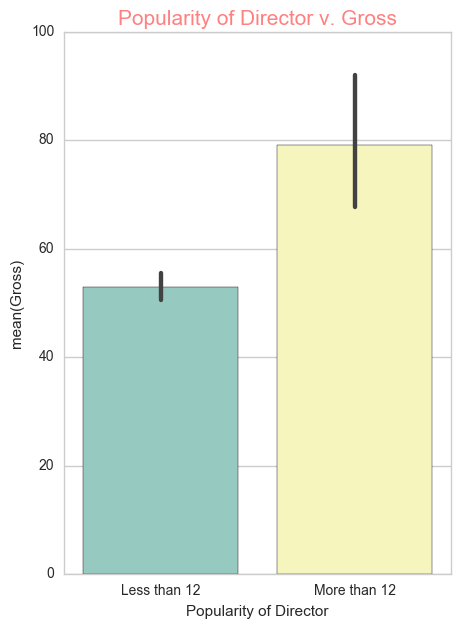

In [85]:
f, ax = plt.subplots(figsize=(5, 7))
Fame = sns.barplot(x="Popularity of Director", y="Gross", data=df_director, palette="Set3")
Fame.axes.set_title('Popularity of Director v. Gross', fontsize=15,color="r",alpha=0.5)

By comparing the revenue of movies from directors who produce fewer films to directors who produce the most films (our measure for how popular a director is) we see that there is a relationship between the popularity of the director and the sucess of the film. On average, directors who produce a lot of films also tend to produce films with higher revenues. 

However, looking at this relationship in isolation can be misleading because it is unclear whether these directors simply make movies that are of higher quality so they generate high revenue, or they generate more revenue because the more recognizable the director is the more likely people are to go see the film. 

## Star Power vs. Gross Revenues

We implemented the same rationale for actors as we did for director, and found very similar results.

In [87]:
df_stars = df.drop(['Director','Number of Votes','Genre','Country','Rating','IMDB Score','Budget','Year'], 1)
df_stars.head()

Actor 1              Actor 2             Actor 3  \
Movie Name                                                                     
Avatar             Joel David Moore          CCH Pounder           Wes Studi   
Titanic                Kate Winslet    Leonardo DiCaprio       Gloria Stuart   
Jurassic World           Judy Greer  Bryce Dallas Howard             Omar Sy   
The Avengers      Robert Downey Jr.      Chris Hemsworth  Scarlett Johansson   
The Dark Knight        Heath Ledger       Christian Bale      Morgan Freeman   

                       Gross  
Movie Name                    
Avatar            760.505847  
Titanic           658.672302  
Jurassic World    652.177271  
The Avengers      623.279547  
The Dark Knight   533.316061

In [88]:
df_stars = df_stars.reset_index()
df_stars.head()

Movie Name            Actor 1              Actor 2  \
0           Avatar    Joel David Moore          CCH Pounder   
1          Titanic        Kate Winslet    Leonardo DiCaprio   
2   Jurassic World          Judy Greer  Bryce Dallas Howard   
3     The Avengers   Robert Downey Jr.      Chris Hemsworth   
4  The Dark Knight        Heath Ledger       Christian Bale   

              Actor 3       Gross  
0           Wes Studi  760.505847  
1       Gloria Stuart  658.672302  
2             Omar Sy  652.177271  
3  Scarlett Johansson  623.279547  
4      Morgan Freeman  533.316061

In [89]:
df_stars.set_index(['Movie Name','Gross'],inplace=True)
df_stars.head()

Actor 1              Actor 2  \
Movie Name       Gross                                                
Avatar           760.505847   Joel David Moore          CCH Pounder   
Titanic          658.672302       Kate Winslet    Leonardo DiCaprio   
Jurassic World   652.177271         Judy Greer  Bryce Dallas Howard   
The Avengers     623.279547  Robert Downey Jr.      Chris Hemsworth   
The Dark Knight  533.316061       Heath Ledger       Christian Bale   

                                        Actor 3  
Movie Name       Gross                           
Avatar           760.505847           Wes Studi  
Titanic          658.672302       Gloria Stuart  
Jurassic World   652.177271             Omar Sy  
The Avengers     623.279547  Scarlett Johansson  
The Dark Knight  533.316061      Morgan Freeman

In [90]:
df_stars = df_stars.stack()
df_stars.head(10)

Movie Name       Gross              
Avatar           760.505847  Actor 1       Joel David Moore
                             Actor 2            CCH Pounder
                             Actor 3              Wes Studi
Titanic          658.672302  Actor 1           Kate Winslet
                             Actor 2      Leonardo DiCaprio
                             Actor 3          Gloria Stuart
Jurassic World   652.177271  Actor 1             Judy Greer
                             Actor 2    Bryce Dallas Howard
                             Actor 3                Omar Sy
The Avengers     623.279547  Actor 1      Robert Downey Jr.
dtype: object

In [91]:
df_stars = pd.DataFrame(df_stars, columns = ['Star'])

df_stars.groupby(df_stars['Star'])
df_stars.head(10)

Star
Movie Name      Gross                                  
Avatar          760.505847 Actor 1     Joel David Moore
                           Actor 2          CCH Pounder
                           Actor 3            Wes Studi
Titanic         658.672302 Actor 1         Kate Winslet
                           Actor 2    Leonardo DiCaprio
                           Actor 3        Gloria Stuart
Jurassic World  652.177271 Actor 1           Judy Greer
                           Actor 2  Bryce Dallas Howard
                           Actor 3              Omar Sy
The Avengers    623.279547 Actor 1    Robert Downey Jr.

In [92]:
df_stars.reset_index(inplace=True) 
df_stars.head()

Movie Name       Gross  level_2               Star
0    Avatar   760.505847  Actor 1   Joel David Moore
1    Avatar   760.505847  Actor 2        CCH Pounder
2    Avatar   760.505847  Actor 3          Wes Studi
3   Titanic   658.672302  Actor 1       Kate Winslet
4   Titanic   658.672302  Actor 2  Leonardo DiCaprio

In [93]:
pd.value_counts(df_stars['Star'])

Robert De Niro         46
Morgan Freeman         36
Bruce Willis           34
Matt Damon             34
Johnny Depp            33
Denzel Washington      31
Bill Murray            30
Steve Buscemi          29
J.K. Simmons           29
Brad Pitt              29
Will Ferrell           29
Robert Downey Jr.      28
Nicolas Cage           28
Tom Hanks              27
Harrison Ford          27
Tom Cruise             26
Julia Roberts          25
Liam Neeson            25
Matthew McConaughey    24
Robin Williams         24
Tom Wilkinson          23
Adam Sandler           23
Jim Broadbent          23
Angelina Jolie Pitt    22
Gerard Butler          22
Keanu Reeves           22
Christian Bale         22
Anthony Hopkins        22
Meryl Streep           22
Judy Greer             22
                       ..
Kevin Breznahan         1
Nina Hartley            1
Alan D. Purwin          1
Jay Leno                1
Patrick Muldoon         1
Alycia Debnam-Carey     1
Jonathan Brandis        1
Tom Sizemore

In [94]:
df_stars['Star Popularity'] = df_stars.groupby('Star')['Star'].transform('count')
df_stars.head()

Movie Name       Gross  level_2               Star  Star Popularity
0    Avatar   760.505847  Actor 1   Joel David Moore                4
1    Avatar   760.505847  Actor 2        CCH Pounder                6
2    Avatar   760.505847  Actor 3          Wes Studi                6
3   Titanic   658.672302  Actor 1       Kate Winslet               18
4   Titanic   658.672302  Actor 2  Leonardo DiCaprio               18

In [95]:
df_stars[df_stars['Star'].str.contains("Robert De Niro",na=False)].head()

Movie Name       Gross  level_2            Star  \
211          Meet the Fockers   279.167575  Actor 2  Robert De Niro   
670          Meet the Parents   166.225040  Actor 2  Robert De Niro   
730                Shark Tale   160.762022  Actor 2  Robert De Niro   
814            Little Fockers   148.383780  Actor 2  Robert De Niro   
1005  Silver Linings Playbook   132.088910  Actor 1  Robert De Niro   

      Star Popularity  
211                46  
670                46  
730                46  
814                46  
1005               46

In [96]:
bins = [0,22,60]
group_names = ['Less than 22','More than 22']
categories = pd.cut(df_stars['Star Popularity'], bins, labels=group_names)
df_stars['Star Popularity'] = pd.cut(df_stars['Star Popularity'], bins, labels=group_names)
categories.head(5)

0    Less than 22
1    Less than 22
2    Less than 22
3    Less than 22
4    Less than 22
Name: Star Popularity, dtype: category
Categories (2, object): [Less than 22 < More than 22]

In [97]:
pd.value_counts(df_stars['Star Popularity'])

Less than 22    9246
More than 22     663
Name: Star Popularity, dtype: int64

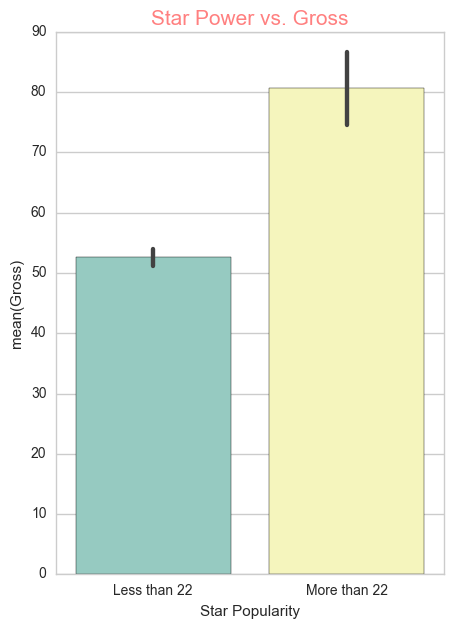

In [98]:
f, ax = plt.subplots(figsize=(5, 7))
StarPower = sns.barplot(x="Star Popularity", y="Gross", data=df_stars, palette="Set3")
StarPower.axes.set_title('Star Power vs. Gross', fontsize=15,color="r",alpha=0.5)

Similarly to what we found with directors, famous actors (i.e. actors who have starred in a higher number of filmds) tend to drive up box office revenues. 

## Conclusions

Upon analyzing all these factors, we found that it is difficult to generalize the film industry as a whole. There are a huge number of variables that can influence whether a movie is successful or not, explaining the industry's highly unpredictable nature. If there was a perfect formula, big Hollywood studios would never produce any flops. 

We found, however, that there are some trends in predicting future success: 
* Higher production budgets, 
* Better quality movies, 
* Non-restrictive ratings, 
* Family-friendly or action-based genres,
* Director popularity and star power. 

This, however, is a small proportion of all the variables that influence movie-going habits and box-office performance. It would be valuable to look at different factors such as month of release, macro-economic influences, or even the weather. 